In [1]:
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt

# Avg delay of sales per month

In [2]:
PATH = "./suncharge/Sales.csv"
df = pd.read_csv(PATH)

In [3]:
data = df[["RequestedDeliveryDate", "DeliveryDate"]]
data = data.values

In [4]:
print(data)

[['2024-11-15' '2024-11-15']
 ['2023-06-15' '2023-06-12']
 ['2022-04-15' '2022-04-15']
 ...
 ['2022-12-23' '2022-12-22']
 ['2022-07-12' '2022-07-08']
 ['2024-11-15' '2024-11-26']]


In [5]:
def days_difference(date_str1, date_str2):
    # Convert date strings to datetime objects
    date1 = datetime.strptime(date_str1, '%Y-%m-%d')
    date2 = datetime.strptime(date_str2, '%Y-%m-%d')

    # Compute the difference between the two dates
    difference = date2 - date1

    # Return the number of days as absolute value
    return difference.days


In [6]:
dp = data[40]
days_difference(dp[0], dp[1])

-4

In [7]:
result = {}
for dp in data:
    date_of_sale = dp[1]
    requested_date_of_sale = dp[0]

    year = date_of_sale.split("-")[0]
    month = date_of_sale.split("-")[1]
    result.setdefault(year, {})
    result[year].setdefault(month, [])
    result[year][month].append(days_difference(date_of_sale, requested_date_of_sale))

avg_result = {}
for year, year_data in result.items():
    avg_result[year] = {month: sum(month_data)/len(month_data) for month, month_data in year_data.items()}

In [8]:
print(json.dumps(avg_result, indent=2))

{
  "2024": {
    "11": 0.09796806966618288,
    "01": 0.08613589567604667,
    "06": 0.0,
    "02": 0.041116005873715125,
    "09": 0.04296125815113157,
    "04": -0.01667245571378951,
    "05": 0.12980269989615784,
    "10": -0.11032388663967611,
    "07": -0.1034363068379035,
    "08": -0.009308986752595776,
    "12": 0.04002808988764045,
    "03": 0.02207001522070015
  },
  "2023": {
    "06": 0.1104775481111903,
    "02": 0.03116583301269719,
    "11": -0.10327085630282984,
    "08": -0.0647282796815507,
    "04": 0.027286702536510377,
    "09": 0.10407766990291262,
    "01": -0.05726256983240224,
    "12": 0.039444850255661065,
    "03": 0.08231292517006802,
    "05": -0.09870388833499502,
    "07": -0.2789240972733972,
    "10": -0.12477969686288333
  },
  "2022": {
    "04": -0.013617960986382039,
    "03": -0.09922113105316627,
    "02": 0.31751662971175165,
    "11": -0.14227642276422764,
    "12": 0.0363963963963964,
    "10": -0.11760154738878142,
    "07": 0.16311800793937

# Avg sales duration per plant

In [9]:
PATH = "./suncharge/Sales.csv"
df = pd.read_csv(PATH)
df

,Unnamed: 0,SalesOrder,SalesOrderItem,SalesOrderCreationDate,CustomerKey,MaterialKey,OrderQuantity,PlantKey,MaterialPlantKey,SalesDocType,RequestedDeliveryDate,DeliveryDate,HighOrderQtyFlag
0,1,10000001,10,2024-10-08,349,1,26,4,10004,Regular,2024-11-15,2024-11-15,0
1,2,10000002,10,2023-05-27,759,1,20,5,10005,Regular,2023-06-15,2023-06-12,0
2,3,10000003,10,2022-03-15,996,1,13,5,10005,Regular,2022-04-15,2022-04-15,0
3,4,10000004,10,2022-03-27,135,2,21,4,20004,Regular,2022-04-15,2022-04-12,0
4,5,10000005,10,2023-01-22,508,2,16,8,20008,Regular,2023-02-23,2023-02-24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,10099996,10,2024-11-12,771,2,13,8,20008,Regular,2024-12-17,2024-12-13,0
99996,99997,10099997,10,2022-05-21,371,1,17,4,10004,Regular,2022-06-13,2022-06-09,0
99997,99998,10099998,10,2022-12-22,860,2,17,8,20008,Express,2022-12-23,2022-12-22,0
99998,99999,10099999,10,2022-06-03,41,1,20,4,10004,Regular,2022-07-12,2022-07-08,0


In [10]:
data = []
columns = [
    "PlantKey",
    "SalesOrderCreationDate",
    "DeliveryDate"
]
for data_point in df[columns].values:
    default = {column: None for column in columns}
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)

In [11]:
sales_per_plant = {}
for dp in data:
    plant_key = dp["PlantKey"]
    sales_per_plant.setdefault(plant_key, [])
    dp["delta"] = days_difference(dp["SalesOrderCreationDate"], dp["DeliveryDate"])
    sales_per_plant[plant_key].append(dp)

In [12]:
sales_per_plant

{4: [{'PlantKey': 4,
   'SalesOrderCreationDate': '2024-10-08',
   'DeliveryDate': '2024-11-15',
   'delta': 38},
  {'PlantKey': 4,
   'SalesOrderCreationDate': '2022-03-27',
   'DeliveryDate': '2022-04-12',
   'delta': 16},
  {'PlantKey': 4,
   'SalesOrderCreationDate': '2024-01-01',
   'DeliveryDate': '2024-01-26',
   'delta': 25},
  {'PlantKey': 4,
   'SalesOrderCreationDate': '2023-10-30',
   'DeliveryDate': '2023-11-20',
   'delta': 21},
  {'PlantKey': 4,
   'SalesOrderCreationDate': '2024-04-26',
   'DeliveryDate': '2024-06-03',
   'delta': 38},
  {'PlantKey': 4,
   'SalesOrderCreationDate': '2022-03-22',
   'DeliveryDate': '2022-04-15',
   'delta': 24},
  {'PlantKey': 4,
   'SalesOrderCreationDate': '2024-01-13',
   'DeliveryDate': '2024-01-15',
   'delta': 2},
  {'PlantKey': 4,
   'SalesOrderCreationDate': '2024-05-21',
   'DeliveryDate': '2024-06-28',
   'delta': 38},
  {'PlantKey': 4,
   'SalesOrderCreationDate': '2023-06-05',
   'DeliveryDate': '2023-06-23',
   'delta': 18},

In [13]:
# sales_per_plant_per_year_month = {}
# for plant_key, sales in sales_per_plant.items():
#     sales_per_plant_per_year_month[plant_key] = {}
#     for sale in sales:
#         year = sale["DeliveryDate"].split("-")[1]
#         month = sale["DeliveryDate"].split("-")[0]
#         year_ = sale["SalesOrderCreationDate"].split("-")[1]
#         month_ = sale["SalesOrderCreationDate"].split("-")[0]
#         # #assumption
#         # assert year == year_ and month == month_, f"year and month of sale creation and delivery do not match, {year}, {year_}, {month}, {month_}"
#         sales_per_plant_per_year_month[plant_key].setdefault(year, {})

In [14]:
import numpy as np
avg_sales_per_plant = {}
for plant_key, sales in sales_per_plant.items():
    distr = {}
    dps = [e["delta"] for e in sales]
    distr["mean"] = np.mean(dps)
    distr["std"] = np.std(dps)
    avg_sales_per_plant[plant_key] = distr

avg_sales_per_plant

{4: {'mean': 26.380563744000778, 'std': 13.41730324810116},
 5: {'mean': 26.52403338263258, 'std': 13.362883784844845},
 8: {'mean': 26.30474609263182, 'std': 13.46983559150354},
 6: {'mean': 26.42520295539542, 'std': 13.329185689154098},
 7: {'mean': 26.654458598726116, 'std': 13.612939792801042}}

# Supply Chain

In [66]:
PATH = "./suncharge/Purchases.csv"
df = pd.read_csv(PATH)

In [77]:
plant_key_map = {
    1001: "ANT1",
    1002: "WRO1",
    1003: "LYO1",
    1: "ANT1",
    2: "WRO1",
    3: "LYO1",
    4: "ANT2",
    5: "WRO2",
    6: "LYO2",
    7: "BIR2",
    8: "GOT2"
}

plant_customer_region_map = {
    "ANT2": ["Belgium", "Germany", "Netherlands"],
    "BIR2": ["United Kingdom"],
    "WRO2": ["Czech Republic", "Greece", "Hungary", "Poland"],
    "GOT2": ["Denmark", "Estonia", "Finland", "Latvia", "Lithuania", "Norway", "Sweden"],
    "LYO2": ["Croatia", "France", "Italy", "Portugal", "Slovenia", "Spain", "Switzerland"]
}

In [78]:
data = []
columns = [
        "PurchaseOrder",
        "PurchaseOrderCreationDate",
        "VendorKey",
        "PlantKey",
        "MaterialKey",
        "MaterialPlantKey",
        "PurchaseOrderQuantity",
        "PlannedGoodsReceiptDate",
        "ActualGoodsReceiptDate",
        "PlannedArrivalDateYard",
        "ActualArrivalDateYard",
        "PlannedVendorShipmentDate",
        "ActualVendorShipmentDate"
]
for data_point in df[columns].values:
    default = {column: None for column in columns}
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)

In [79]:
def days_difference(date_str1, date_str2):
    date1 = datetime.strptime(date_str1, '%Y-%m-%d')
    date2 = datetime.strptime(date_str2, '%Y-%m-%d')
    difference = date2 - date1
    return difference.days

def to_date(date_str1):
    return datetime.strptime(date_str1, '%Y-%m-%d')

In [80]:
#Checking assumption that ActualGoodsReceiptDate > ActualArrivalDateYard for every purchase
for dp in data:
    vendor_shipment_date = to_date(dp["ActualVendorShipmentDate"])
    arrival_yard = to_date(dp["ActualArrivalDateYard"])
    goods_receipt = to_date(dp["ActualGoodsReceiptDate"])

    if arrival_yard < vendor_shipment_date:
        print("1:", dp["PurchaseOrder"], arrival_yard, vendor_shipment_date)
        break

    if goods_receipt < arrival_yard:
        print("2:", dp["PurchaseOrder"], arrival_yard, goods_receipt)
        break

2: 4500000002 2023-03-26 00:00:00 2023-03-24 00:00:00


In [81]:
processed_data = []
for dp in data:
    processed_data.append({
        "production_plant": plant_key_map[dp["VendorKey"]],
        "distribution_center": plant_key_map[dp["PlantKey"]],
        "delta_vendor_shipment_and_arrival_yard": days_difference(dp["ActualVendorShipmentDate"], dp["ActualGoodsReceiptDate"]),
        # "delta_arrival_yard_and_goods_receipt_date": days_difference(dp["ActualArrivalDateYard"], dp["ActualGoodsReceiptDate"]),
        "customer_region": plant_customer_region_map[plant_key_map[dp["PlantKey"]]]
    })
processed_data

[{'production_plant': 'WRO1',
  'distribution_center': 'WRO2',
  'delta_vendor_shipment_and_arrival_yard': 3,
  'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
 {'production_plant': 'ANT1',
  'distribution_center': 'BIR2',
  'delta_vendor_shipment_and_arrival_yard': -1,
  'customer_region': ['United Kingdom']},
 {'production_plant': 'WRO1',
  'distribution_center': 'GOT2',
  'delta_vendor_shipment_and_arrival_yard': 4,
  'customer_region': ['Denmark',
   'Estonia',
   'Finland',
   'Latvia',
   'Lithuania',
   'Norway',
   'Sweden']},
 {'production_plant': 'ANT1',
  'distribution_center': 'ANT2',
  'delta_vendor_shipment_and_arrival_yard': -1,
  'customer_region': ['Belgium', 'Germany', 'Netherlands']},
 {'production_plant': 'LYO1',
  'distribution_center': 'LYO2',
  'delta_vendor_shipment_and_arrival_yard': 2,
  'customer_region': ['Croatia',
   'France',
   'Italy',
   'Portugal',
   'Slovenia',
   'Spain',
   'Switzerland']},
 {'production_plant': 'WRO1',
  'd

In [82]:
data_sorted_by_production_plant = {}
for dp in processed_data:
    route = f"{dp['production_plant']}-{dp['distribution_center']}"
    data_sorted_by_production_plant.setdefault(route, [])
    data_sorted_by_production_plant[route].append(dp)

data_sorted_by_distribution_center = {}
for dp in processed_data:
    route = f"{dp['distribution_center']}-{','.join(dp['customer_region'])}"
    data_sorted_by_distribution_center.setdefault(route, [])
    data_sorted_by_distribution_center[route].append(dp)

### sorted by production plant

In [83]:
avg_data_sorted_by_production_plant = {}
for route, data in data_sorted_by_production_plant.items():
    avg_data = {
        "production_plant": data[0]["production_plant"],
        "distribution_center": data[0]["distribution_center"],
        "customer_region": data[0]["customer_region"],
    }
    l = len(data)

    avg_vendor_shipment_date_delta = sum([e["delta_vendor_shipment_and_arrival_yard"] for e in data]) / l 
    avg_data["avg_delta_vendor_shipment_and_arrival_yard"] = avg_vendor_shipment_date_delta
    avg_goods_receipt_date_delta = sum([e["delta_arrival_yard_and_goods_receipt_date"] for e in data]) / l 
    # avg_data["avg_delta_arrival_yard_and_goods_receipt_date"] = avg_goods_receipt_date_delta
    # avg_data_sorted_by_production_plant[route] = avg_data

KeyError: 'delta_arrival_yard_and_goods_receipt_date'

In [ ]:
print(json.dumps(avg_data_sorted_by_production_plant, indent=2))

{
  "WRO1-WRO2": {
    "production_plant": "WRO1",
    "distribution_center": "WRO2",
    "customer_region": [
      "Czech Republic",
      "Greece",
      "Hungary",
      "Poland"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 1.0531973539140023,
    "avg_delta_arrival_yard_and_goods_receipt_date": 0.44377067254685776
  },
  "ANT1-BIR2": {
    "production_plant": "ANT1",
    "distribution_center": "BIR2",
    "customer_region": [
      "United Kingdom"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 1.0,
    "avg_delta_arrival_yard_and_goods_receipt_date": 0.308411214953271
  },
  "WRO1-GOT2": {
    "production_plant": "WRO1",
    "distribution_center": "GOT2",
    "customer_region": [
      "Denmark",
      "Estonia",
      "Finland",
      "Latvia",
      "Lithuania",
      "Norway",
      "Sweden"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 2.0683544303797468,
    "avg_delta_arrival_yard_and_goods_receipt_date": 0.47566807313642756
  },
  "ANT1-ANT

In [ ]:
# avg_data_sorted_by_distribution_center = {}
# for route, data in data_sorted_by_distribution_center.items():
#     avg_data = {
#         "production_plant": data[0]["production_plant"],
#         "distribution_center": data[0]["distribution_center"],
#         "customer_region": data[0]["customer_region"],
#     }
#     l = len(data)

#     avg_vendor_shipment_date_delta = sum([e["delta_vendor_shipment_and_arrival_yard"] for e in data]) / l 
#     avg_data["avg_delta_vendor_shipment_and_arrival_yard"] = avg_vendor_shipment_date_delta
#     avg_goods_receipt_date_delta = sum([e["delta_arrival_yard_and_goods_receipt"] for e in data]) / l 
#     avg_data["avg_delta_arrival_yard_and_goods_receipt"] = avg_goods_receipt_date_delta

#     avg_data_sorted_by_distribution_center[route] = avg_data
# avg_data_sorted_by_distribution_center

KeyError: 'delta_arrival_yard_and_goods_receipt'

In [ ]:
# print(json.dumps(avg_data_sorted_by_distribution_center, indent=2))

{
  "WRO2-Czech Republic,Greece,Hungary,Poland": {
    "production_plant": "WRO1",
    "distribution_center": "WRO2",
    "customer_region": [
      "Czech Republic",
      "Greece",
      "Hungary",
      "Poland"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 1.0531973539140023,
    "avg_delta_arrival_yard_and_goods_receipt": 0.44377067254685776
  },
  "BIR2-United Kingdom": {
    "production_plant": "ANT1",
    "distribution_center": "BIR2",
    "customer_region": [
      "United Kingdom"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 1.0,
    "avg_delta_arrival_yard_and_goods_receipt": 0.308411214953271
  },
  "GOT2-Denmark,Estonia,Finland,Latvia,Lithuania,Norway,Sweden": {
    "production_plant": "WRO1",
    "distribution_center": "GOT2",
    "customer_region": [
      "Denmark",
      "Estonia",
      "Finland",
      "Latvia",
      "Lithuania",
      "Norway",
      "Sweden"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 2.0683544303797468,
    "av

# MaterialPlantRelation

In [ ]:
PATH = "./suncharge/MaterialPlantRelation.csv"
df = pd.read_csv(PATH)

In [ ]:
list(df.columns[1:])

['MaterialKey',
 'PlantKey',
 'MaterialPlantKey',
 'VendorKey',
 'StandardCost',
 'Currency',
 'ProductionTime',
 'InboundTransportationTime',
 'GoodReceiptProcessingTime',
 'TotalInboundLeadTime',
 'SafetyStockQty']

In [ ]:
df

,Unnamed: 0,MaterialKey,PlantKey,MaterialPlantKey,VendorKey,StandardCost,Currency,ProductionTime,InboundTransportationTime,GoodReceiptProcessingTime,TotalInboundLeadTime,SafetyStockQty
0,1,1,4,10004,1001,2680.05,EUR,20,1,2,23,1000.0
1,2,1,5,10005,1002,11547.17,PLN,20,1,2,23,500.0
2,3,1,6,10006,1003,2720.05,EUR,20,1,2,23,600.0
3,4,1,7,10007,1001,2522.97,GBP,20,1,2,23,30.0
4,5,1,8,10008,1002,31173.03,SEK,20,2,2,24,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104,105,29,3,290003,1,NaN,EUR,6,32,2,40,NaN
105,106,30,3,300003,1,NaN,EUR,11,32,2,45,NaN
106,107,31,3,310003,1,NaN,EUR,11,32,2,45,NaN
107,108,32,3,320003,2,NaN,EUR,3,2,2,7,NaN


In [ ]:
data = []
columns = [
    "PlantKey",
    "ProductionTime",
    "InboundTransportationTime",
    "GoodReceiptProcessingTime",
    "TotalInboundLeadTime"
]
for data_point in df[columns].values:
    default = {
        "PlantKey": None,
        "ProductionTime": None,
        "InboundTransportationTime": None,
        "GoodReceiptProcessingTime": None,
        "TotalInboundLeadTime": None
    }
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)

In [ ]:
data_sorted_by_plant = {}
for dp in data:
    key = dp["PlantKey"]
    data_sorted_by_plant.setdefault(key, [])
    data_sorted_by_plant[key].append(dp)
data_sorted_by_plant

{4: [{'PlantKey': 4,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23},
  {'PlantKey': 4,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23}],
 5: [{'PlantKey': 5,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23},
  {'PlantKey': 5,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23}],
 6: [{'PlantKey': 6,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23},
  {'PlantKey': 6,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23}],
 7: [{'PlantKey': 7,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
  

In [ ]:
avg_data = {}
for plant_key, data_ in data_sorted_by_plant.items():
    avg_plant_data = {}
    l = len(data_)
    avg_plant_data["InboundTransportationTime"] = np.mean(([e["InboundTransportationTime"] for e in data_]))
    avg_plant_data["GoodReceiptProcessingTime"] = np.mean([e["GoodReceiptProcessingTime"] for e in data_])
    avg_plant_data["TotalInboundLeadTime"] = np.mean([e["TotalInboundLeadTime"] for e in data_])
    avg_plant_data["ProductionTime"] = np.mean([e["ProductionTime"] for e in data_])
    avg_data[plant_key] = avg_plant_data
avg_data

{4: {'InboundTransportationTime': 1.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 23.0,
  'ProductionTime': 20.0},
 5: {'InboundTransportationTime': 1.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 23.0,
  'ProductionTime': 20.0},
 6: {'InboundTransportationTime': 1.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 23.0,
  'ProductionTime': 20.0},
 7: {'InboundTransportationTime': 1.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 23.0,
  'ProductionTime': 20.0},
 8: {'InboundTransportationTime': 2.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 24.0,
  'ProductionTime': 20.0},
 1: {'InboundTransportationTime': 14.181818181818182,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 24.87878787878788,
  'ProductionTime': 8.696969696969697},
 2: {'InboundTransportationTime': 15.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 25.696969696969695,
  'ProductionTime': 8.69696969696

In [ ]:
avg_data.keys()

dict_keys([4, 5, 6, 7, 8, 1, 2, 3])

{'InboundTransportationTime': [1.0, 1.0, 1.0, 1.0, 2.0, 14.181818181818182, 15.0, 15.121212121212121], 'GoodReceiptProcessingTime': [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], 'TotalInboundLeadTime': [23.0, 23.0, 23.0, 23.0, 24.0, 24.87878787878788, 25.696969696969695, 25.818181818181817], 'ProductionTime': [20.0, 20.0, 20.0, 20.0, 20.0, 8.696969696969697, 8.696969696969697, 8.696969696969697]}


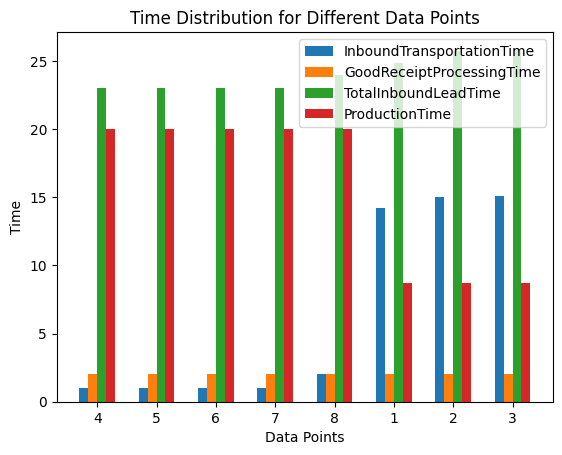

In [ ]:
def log(e):
    print("log:",e)
    return e


labels = ['InboundTransportationTime', 'GoodReceiptProcessingTime', 'TotalInboundLeadTime', 'ProductionTime']
values = {label: [avg_data[key][label] for key in avg_data.keys()] for label in labels}
print(values)
x = range(len(avg_data))

# Plotting
fig, ax = plt.subplots()
width = 0.15

for i, label in enumerate(labels):
    ax.bar([pos + width*i for pos in x], values[label], width=width, label=label)

ax.set_xticks([pos + width*1.5 for pos in x])
ax.set_xticklabels(avg_data.keys())
ax.set_xlabel('Data Points')
ax.set_ylabel('Time')
ax.legend()
plt.title('Time Distribution for Different Data Points')
plt.show()

# Inventory

In [ ]:
PATH = "./suncharge/Inventory.csv"
df = pd.read_csv(PATH)

In [ ]:
data = []
columns = [
    "MaterialKey",
    "PlantKey",
    "GrossInventoryQuantity",
    "OnShelfInventoryQuantity",
    "InTransitQuantity"
]
for data_point in df[columns].values:
    default = {
        "MaterialKey": None,
        "PlantKey": None,
        "GrossInventoryQuantity": None,
        "OnShelfInventoryQuantity": None,
        "InTransitQuantity": None
    }
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)

In [ ]:
data_sorted_by_production_plant = {}
for dp in data:
    key = int(dp["PlantKey"])
    data_sorted_by_production_plant.setdefault(key, [])
    data_sorted_by_production_plant[key].append(dp)
data_sorted_by_production_plant

{4: [{'MaterialKey': 1.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 1753.0,
   'OnShelfInventoryQuantity': 1626.0,
   'InTransitQuantity': 127.0},
  {'MaterialKey': 2.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 614.0,
   'OnShelfInventoryQuantity': 566.0,
   'InTransitQuantity': 48.0},
  {'MaterialKey': 1.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 1612.76,
   'OnShelfInventoryQuantity': 1460.0,
   'InTransitQuantity': 152.76},
  {'MaterialKey': 2.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 656.98,
   'OnShelfInventoryQuantity': 575.0,
   'InTransitQuantity': 81.98},
  {'MaterialKey': 1.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 1403.1012,
   'OnShelfInventoryQuantity': 1226.0,
   'InTransitQuantity': 177.1012},
  {'MaterialKey': 2.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 551.8632,
   'OnShelfInventoryQuantity': 497.0,
   'InTransitQuantity': 54.8632},
  {'MaterialKey': 1.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 1613.56638,


In [ ]:
avg_data = {}
for plant_key, data in data_sorted_by_production_plant.items():
    avg_plant_data = {}
    l = len(data)
    avg_plant_data["GrossInventoryQuantity"] = sum([e["GrossInventoryQuantity"] for e in data]) / l
    avg_plant_data["OnShelfInventoryQuantity"] = sum([e["OnShelfInventoryQuantity"] for e in data]) / l
    avg_plant_data["InTransitQuantity"] = sum([e["InTransitQuantity"] for e in data]) / l
    avg_data[plant_key] = avg_plant_data
avg_data

{4: {'GrossInventoryQuantity': 1167.816701555109,
  'OnShelfInventoryQuantity': 1043.7307692307693,
  'InTransitQuantity': 124.08593232433964},
 5: {'GrossInventoryQuantity': 403.46110406433377,
  'OnShelfInventoryQuantity': 360.3269230769231,
  'InTransitQuantity': 43.1341809874108},
 6: {'GrossInventoryQuantity': 653.674102879457,
  'OnShelfInventoryQuantity': 588.5192307692307,
  'InTransitQuantity': 65.15487211022638},
 7: {'GrossInventoryQuantity': 43.938772673510854,
  'OnShelfInventoryQuantity': 39.53846153846154,
  'InTransitQuantity': 4.400311135049326},
 8: {'GrossInventoryQuantity': 624.5811219979465,
  'OnShelfInventoryQuantity': 563.8653846153846,
  'InTransitQuantity': 60.7157373825619}}

In [ ]:
data_sorted_by_production_plant_and_material = {}
for plant_key, data in data_sorted_by_production_plant.items():
    data_sorted_by_material = {}
    for dp in data:
        material_key = dp["MaterialKey"]
        data_sorted_by_material.setdefault(material_key, [])
        data_sorted_by_material[material_key].append(dp)
    data_sorted_by_production_plant_and_material[plant_key] = data_sorted_by_material
data_sorted_by_production_plant_and_material

{4: {1.0: [{'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1753.0,
    'OnShelfInventoryQuantity': 1626.0,
    'InTransitQuantity': 127.0},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1612.76,
    'OnShelfInventoryQuantity': 1460.0,
    'InTransitQuantity': 152.76},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1403.1012,
    'OnShelfInventoryQuantity': 1226.0,
    'InTransitQuantity': 177.1012},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1613.56638,
    'OnShelfInventoryQuantity': 1477.0,
    'InTransitQuantity': 136.56638},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1855.601337,
    'OnShelfInventoryQuantity': 1599.0,
    'InTransitQuantity': 256.601337},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 2078.27349744,
    'OnShelfInventoryQuantity': 1796.0,
    'InTransitQuantity': 282.27349744},
   {'MaterialKey

In [ ]:
avg_data_sorted_by_production_plant_and_material = {}
for plant_key, plant_data in data_sorted_by_production_plant_and_material.items():
    avg_plant_data = {}
    for material_key, material_data in plant_data.items():
        avg_data_sorted_by_material = {}
        l = len(data)
        avg_data_sorted_by_material["AvgGrossInventoryQuantity"] = sum([e["GrossInventoryQuantity"] for e in material_data]) / l
        avg_data_sorted_by_material["AvgOnShelfInventoryQuantity"] = sum([e["OnShelfInventoryQuantity"] for e in material_data]) / l
        avg_data_sorted_by_material["AvgInTransitQuantity"] = sum([e["InTransitQuantity"] for e in material_data]) / l

        avg_plant_data[material_key] = avg_data_sorted_by_material
    avg_data_sorted_by_production_plant_and_material[plant_key] = avg_plant_data

avg_data_sorted_by_production_plant_and_material

{4: {1.0: {'AvgGrossInventoryQuantity': 1026.193433276569,
   'AvgOnShelfInventoryQuantity': 916.6730769230769,
   'AvgInTransitQuantity': 109.52035635349225},
  2.0: {'AvgGrossInventoryQuantity': 141.62326827853974,
   'AvgOnShelfInventoryQuantity': 127.0576923076923,
   'AvgInTransitQuantity': 14.565575970847389}},
 5: {1.0: {'AvgGrossInventoryQuantity': 258.34095548230266,
   'AvgOnShelfInventoryQuantity': 231.0,
   'AvgInTransitQuantity': 27.340955482302622},
  2.0: {'AvgGrossInventoryQuantity': 145.12014858203122,
   'AvgOnShelfInventoryQuantity': 129.32692307692307,
   'AvgInTransitQuantity': 15.793225505108184}},
 6: {1.0: {'AvgGrossInventoryQuantity': 362.0472584479395,
   'AvgOnShelfInventoryQuantity': 327.86538461538464,
   'AvgInTransitQuantity': 34.18187383255481},
  2.0: {'AvgGrossInventoryQuantity': 291.6268444315179,
   'AvgOnShelfInventoryQuantity': 260.65384615384613,
   'AvgInTransitQuantity': 30.972998277671593}},
 7: {1.0: {'AvgGrossInventoryQuantity': 34.2756207141

# Sales

In [ ]:
PATH = "./suncharge/Sales.csv"
df = pd.read_csv(PATH)

In [ ]:
sale_dates = df["SalesOrderCreationDate"]
sale_dates = [datetime.strptime(e, '%Y-%m-%d') for e in sale_dates]
sale_dates.sort()

In [ ]:
min_date = datetime.strftime(sale_dates[0], '%Y-%m-%d')
max_date = datetime.strftime(sale_dates[-1], '%Y-%m-%d')
max_year = int(max_date.split("-")[0])
max_month = int(max_date.split("-")[1])

year = int(min_date.split("-")[0])
month = int(min_date.split("-")[1])

dates = []

def format_month(month):
    month = str(month)
    if len(month) == 1:
        return f"0{month}"
    return month

while (year, month) != (max_year, max_month):
    dates.append(f"{year}-{format_month(month)}")
    month += 1
    if month > 12:
        year += 1
        month = 1
dates.append(f"{max_year}-{format_month(max_month)}")

In [ ]:
plants = set(df["PlantKey"])
dates_per_plant = {}
for plant in plants:
    dates_per_plant[plant] = {date: 0 for date in dates}
dates_per_plant

{4: {'2022-01': 0,
  '2022-02': 0,
  '2022-03': 0,
  '2022-04': 0,
  '2022-05': 0,
  '2022-06': 0,
  '2022-07': 0,
  '2022-08': 0,
  '2022-09': 0,
  '2022-10': 0,
  '2022-11': 0,
  '2022-12': 0,
  '2023-01': 0,
  '2023-02': 0,
  '2023-03': 0,
  '2023-04': 0,
  '2023-05': 0,
  '2023-06': 0,
  '2023-07': 0,
  '2023-08': 0,
  '2023-09': 0,
  '2023-10': 0,
  '2023-11': 0,
  '2023-12': 0,
  '2024-01': 0,
  '2024-02': 0,
  '2024-03': 0,
  '2024-04': 0,
  '2024-05': 0,
  '2024-06': 0,
  '2024-07': 0,
  '2024-08': 0,
  '2024-09': 0,
  '2024-10': 0,
  '2024-11': 0,
  '2024-12': 0},
 5: {'2022-01': 0,
  '2022-02': 0,
  '2022-03': 0,
  '2022-04': 0,
  '2022-05': 0,
  '2022-06': 0,
  '2022-07': 0,
  '2022-08': 0,
  '2022-09': 0,
  '2022-10': 0,
  '2022-11': 0,
  '2022-12': 0,
  '2023-01': 0,
  '2023-02': 0,
  '2023-03': 0,
  '2023-04': 0,
  '2023-05': 0,
  '2023-06': 0,
  '2023-07': 0,
  '2023-08': 0,
  '2023-09': 0,
  '2023-10': 0,
  '2023-11': 0,
  '2023-12': 0,
  '2024-01': 0,
  '2024-02': 0,
 

In [ ]:
data = []
columns = [
    "PlantKey",
    "SalesOrderCreationDate",
    "OrderQuantity"
]
for data_point in df[columns].values:
    default = {column: None for column in columns}
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)

In [ ]:
for dp in data:
    plant_key = dp["PlantKey"]
    date = f"{dp['SalesOrderCreationDate'].split('-')[0]}-{dp['SalesOrderCreationDate'].split('-')[1]}"
    dates_per_plant[plant_key][date] += dp["OrderQuantity"]

In [ ]:
print(json.dumps(dates_per_plant, indent=2))

{
  "4": {
    "2022-01": 20371,
    "2022-02": 19728,
    "2022-03": 20878,
    "2022-04": 20668,
    "2022-05": 22044,
    "2022-06": 20775,
    "2022-07": 21434,
    "2022-08": 20038,
    "2022-09": 19447,
    "2022-10": 19158,
    "2022-11": 19880,
    "2022-12": 21660,
    "2023-01": 20841,
    "2023-02": 18916,
    "2023-03": 21682,
    "2023-04": 21004,
    "2023-05": 20717,
    "2023-06": 20095,
    "2023-07": 21297,
    "2023-08": 19852,
    "2023-09": 20474,
    "2023-10": 20361,
    "2023-11": 20888,
    "2023-12": 19846,
    "2024-01": 21601,
    "2024-02": 20043,
    "2024-03": 19973,
    "2024-04": 19942,
    "2024-05": 21114,
    "2024-06": 19599,
    "2024-07": 20571,
    "2024-08": 19540,
    "2024-09": 21019,
    "2024-10": 21923,
    "2024-11": 20136,
    "2024-12": 21125
  },
  "5": {
    "2022-01": 10335,
    "2022-02": 8953,
    "2022-03": 9884,
    "2022-04": 9360,
    "2022-05": 9832,
    "2022-06": 9016,
    "2022-07": 9700,
    "2022-08": 9623,
    "2022-09": 

In [ ]:
min_sales = float("inf")
max_sales = float("-inf")
for plant, plant_sales in dates_per_plant.items():
    for v in plant_sales.values():
        if v < min_sales:
            min_sales = v
        if v > max_sales:
            max_sales = v
min_sales, max_sales

(165, 22044)

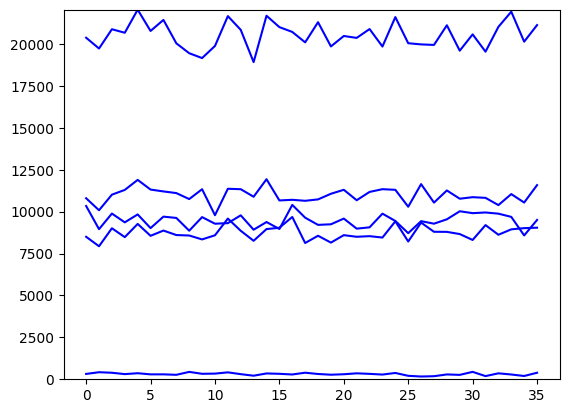

In [ ]:
plt.figure()
plt.ylim(0, max_sales)

for plant_key, plant_sales in dates_per_plant.items():
    y = list(plant_sales.values())
    x = [i for i in range(len(y))]  
    plt.plot(x, y, c="blue")

# avg duration sale per plant

In [ ]:
PATH = "./suncharge/Sales.csv"
df = pd.read_csv(PATH)

In [ ]:
data = []
columns = [
    "PlantKey",
    "SalesOrderCreationDate",
    "DeliveryDate"
]
for data_point in df[columns].values:
    default = {column: None for column in columns}
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)